 # **Data Loading and Preparation**

In [1]:
# importing libraries
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [40]:
# loading dataset
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [29]:
# looking to see what feature name corresponds to what index number
feature_names = diabetes.feature_names

# printing the feature names with their indices
for i, feature_name in enumerate(feature_names):
    print(f"Feature index {i}: {feature_name}")

Feature index 0: age
Feature index 1: sex
Feature index 2: bmi
Feature index 3: bp
Feature index 4: s1
Feature index 5: s2
Feature index 6: s3
Feature index 7: s4
Feature index 8: s5
Feature index 9: s6


In [42]:
# creating two required arrays
X = diabetes.data
y = diabetes.target

# selecting feature
feature_selection_index = 2
feature_selection = X[:, feature_selection_index]

# printing the shape of my selected feature
print("Selected feature shape:", feature_selection.shape)

# predicitng the target disease progression
model = LinearRegression()
model.fit(feature_selection.reshape(-1, 1), y)

# performing the full prediction
prediction = model.predict(feature_selection.reshape(-1, 1))

# splitting into test and training sets
test_size = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, shuffle = False)

# printing the shapes of each of the training and test sets
print("Shape of X_train (training set):", X_train.shape)
print("Shape of X_test (test set):", X_test.shape)
print("Shape of y_train (training set):", y_train.shape)
print("Shape of y_test (test set):", y_test.shape)

Selected feature shape: (442,)
Shape of X_train (training set): (422, 10)
Shape of X_test (test set): (20, 10)
Shape of y_train (training set): (422,)
Shape of y_test (test set): (20,)


### __Observation:__ 

 **I chose index 2 which is BMI as a target beacuse in this dataset, I aim to observe the correlation between BMI and diabetes from this dataset.**

# **Model Training** 

### **Linear Regression model trained with single feature and target sets**

In [47]:
X = diabetes.data[:, 2]
y = diabetes.target

# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, shuffle = False)

# reshapping the feature arrays to match for the linear regression model
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# instantiating a linear regressison
model = LinearRegression()

# training the model
model.fit(X_train, y_train)

# evaluating the model and printing the scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Test R^2 score:", test_score)

Training R^2 score: 0.3351312506867543
Test R^2 score: 0.47257544798227136


# __Prediction and Measurement__ 

In [51]:
# obtaining predictions on the training set
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# first 10 predictions
print("First 10 predictions on the training set:")
for i in range(10):
    print(train_predictions[i])

# printing out feature coefficient
feature_coefficient = model.coef_[0][0]
print("Feature coefficient:", feature_coefficient)

# calculating the root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

# printing the RMSE
print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


First 10 predictions on the training set:
[210.80457868]
[104.6239487]
[194.62467316]
[142.03998022]
[118.78136603]
[114.73638965]
[108.66892508]
[151.14117707]
[210.80457868]
[189.56845268]
Feature coefficient: 938.2378612512633
Training RMSE: 62.888948579232846
Test RMSE: 50.47843498689287


# __Visualization__

<function matplotlib.pyplot.show(close=None, block=None)>

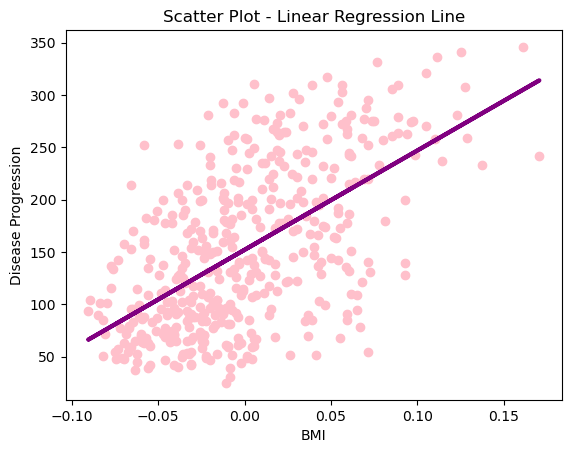

In [57]:
# reshaping the feature array once more to match the expected input shapre for the LR
X = X.reshape(-1, 1)

# reinstantiating the LR
model = LinearRegression()

# refitting the model
model.fit(X, y)

# regrabbing predictions from the LR model
predictions = model.predict(X)

# creating scatterplot with LR line
plt.scatter(X, y, color = "pink", label = "Actual")
plt.plot(X, predictions, color = "purple", linewidth = 3, label = "Linear Regression Line")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Scatter Plot - Linear Regression Line")
plt.legend

# displaying scatter plot
plt.show
